<img src="http://media1.gameinformer.com/images/site/pages/gamer_culture_logo.jpg" alt="Game" style="width:1000px;height:300px;">

<h1 style="text-align:center">Foundations of Data Science Project</h1>
<h2 style="text-align:center">Professor Rumi Chunara</h2>
<h2 style="text-align:center">CS-GY 6053 Fall 2017</h2>
<h3 style="text-align:center">Team Members:</h3>
<h3 style="text-align:center">Harsh Yadav (hy1217)</h3>
<h3 style="text-align:center">Arhant Jain (aj1973)</h3>

<p style="color:Teal">Importing all essential libraries and creating a dataframe named df1 which reads the csv file.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df1 = pd.read_csv('C:/Users/Harsh Yadav/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv', header=0)

<p style="color:Red">Our Data represents the column Ratings in terms of categorical values. Therefore, ratings represent Age Group Categories and are not numerical figures as explained below. This note has been added on Teaching Assistants recommendation.</p>

<p style="color:Teal">Plotting graphs:</p>
<p style="color:Teal">First plot represent the Total Ratings by each category. Ratings are denoted as:<br />
1. E: Everyone<br />
2. AO: Adult Only<br />
3. E10+: Everyone above 10 years of age<br /> 
4. EC: Early Childhood<br />
5. K.A: Kids to Adults<br />
6. M: Mature<br />
7. RP: Rating Pending<br />
8. T: Teenagers</p>
<p style="color:Teal">Second plot represents the total ratings by each continent represented by different colors. We ignored Global Sales, as it was just a sum of all the sales and it would not make any sense to plot it with other sales.</p>

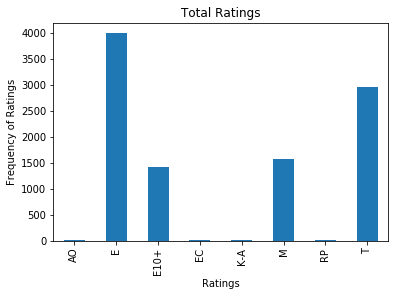

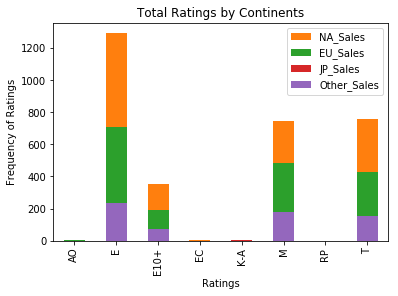

In [2]:
ax1=df1['Rating'].groupby([df1.Rating]).count().plot(kind='bar')  #Plot of Ratings by count
plt.title('Total Ratings')
ax1.set_xlabel("Ratings")
ax1.set_ylabel("Frequency of Ratings")
plt.show()
fig = plt.figure()
ax = plt.subplot(111)
df1['NA_Sales'].groupby([df1.Rating]).sum().plot(kind='bar', color="C1")           #Plot of Sales by Ratings
df1['EU_Sales'].groupby([df1.Rating]).sum().plot(kind='bar', color="C2")
df1['JP_Sales'].groupby([df1.Rating]).sum().plot(kind='bar', color="C3")
df1['Other_Sales'].groupby([df1.Rating]).sum().plot(kind='bar', color="C4")
plt.title('Total Ratings by Continents')
ax.legend()
ax.set_xlabel("Ratings")
ax.set_ylabel("Frequency of Ratings")
plt.show()

## Part 1: Predicting Ratings/ Age Group for a Video Game

<p style="color:Teal">In this part we will be analyzing the Ratings/ Age Group in which the video Game will be most famous. The different categories of Ratings/ Age Groups have been defined above in the notebook. Ratings is our target variable and rest of the columns are the predictors</p>

<p style="color:Teal">A function named clean has been defined which drops all the rows having NaN values in the Name, Publisher, User_Score, Developer and the Rating columns as these columns are the essential ones and NaN values will greatly affect our predictions because it makes no sense to make predictions based on game name, developer which are just unique string and user score which has a lot of missing values. Then the Developer, NA_Sales, EU_Sales, JP_Sales, Other_Sales and Global_Sales columns have been dropped as after testing the most essential features required for the Decision Tree algorithm we found out that only the Name, Platform, Year_of_Release, Genre, Publisher, Critic_Score, Critic_Count, User_Score, User_Count and Ratings (our target variable) are the most important features. So, we are only considering these for our predictions. Further, all the NaN values in remaining columns have been replaced by the medain of that column and then all the variables that are of type object and have been factorized into numerical values to make predictions.</p>

In [3]:
def clean(data):
    data=data.dropna(subset=['Name'])
    data=data.dropna(subset=['Publisher'])
    data=data.dropna(subset=['User_Score'])
    data=data.dropna(subset=['Developer'])
    data=data.dropna(subset=['Rating'])
    
    del data['Developer']   #Dropping of Non essential features
    del data['NA_Sales']
    del data['EU_Sales']
    del data['JP_Sales']
    del data['Other_Sales']
    del data['Global_Sales']
    
    data=data.fillna(data.median())         #Replacing NaN with median values of that column
    
    data.T.apply(lambda x: x.nunique(), axis=1)
    
    cols = data.dtypes.pipe(lambda y: y[y == 'object']).index
    for c in cols:
        data[c] = pd.factorize(data[c])[0]     #factorize the column values with numbers
    return data

<p style="color:Teal">Creating dataframes named df which contains the 9 rows left after cleaning the data and then the time of execution has been taken out.</p>

In [4]:
import math

df=clean(df1)

%timeit [clean(df1)]

222 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<p style="color:Teal">Dataframe df has been split into Training and testing data using a randomiser function. Then the Rating column has been set as the target variable and the rest of the columns as the predictors. Further the Decision Tree algorithm has been used with the criterion as 'entropy' and the result of the prediction has been stored in a variable named results_dt.</p>

In [5]:
train_df=df.sample(frac=0.7,random_state=50)  #Training data
test_df=df.drop(train_df.index)               #Testing data

Xdt_train=train_df.iloc[:,0:8]
Ydt_train=train_df['Rating']                   
Xdt_test=test_df.iloc[:,0:8]
Ydt_test=test_df['Rating']
clf = tree.DecisionTreeClassifier(criterion="entropy")     #Modelling using Decision Trees
clf = clf.fit(Xdt_train, Ydt_train)
results_dt = clf.predict(Xdt_test)

<p style="color:Teal">Correlation has been plotted in the form of heatmap where the blue color represents positive correlation and red represents negative correlation between the variables. As we are considering Rating as our target variable, we can see that only Genre, Critic Count and Year of Relaease are the two variables that are positively correlated to it, few of the variables are negatively correlated and most variables are independent as represented on the color scale.</p>

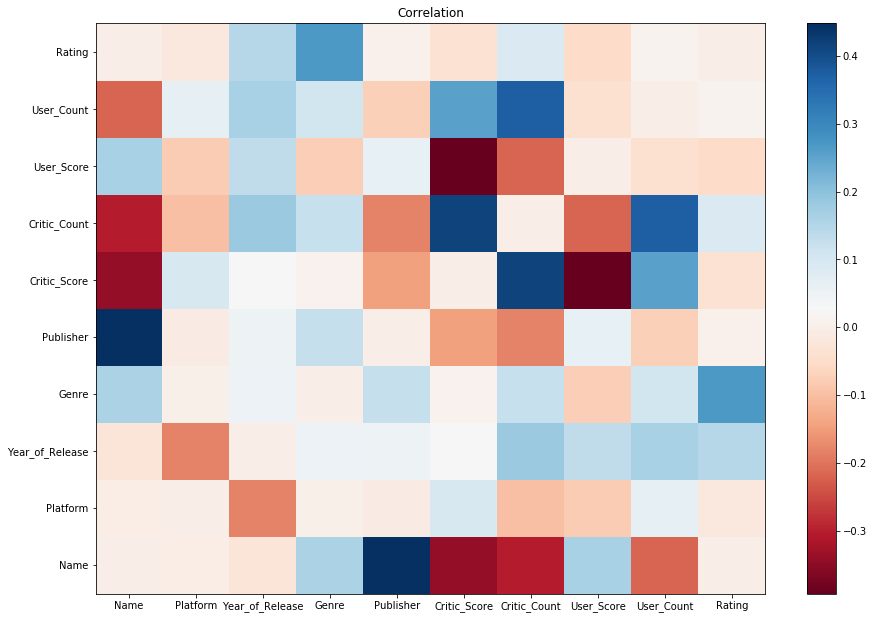

In [6]:
import matplotlib.pyplot as plt
dpro = df.copy()

c_mat = dpro.corr()
for i in range(c_mat.shape[0]):
    c_mat.iloc[i,i] = 0

fig, ax = plt.subplots()
heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)

#Set the tick labels and center them
ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
ax.set_xticklabels(c_mat.index.values, minor=False)
ax.set_yticklabels(c_mat.index.values, minor=False)

fig.set_size_inches(15, 10.5, forward=True)
cbar = plt.colorbar(heatmap)
plt.title('Correlation')

plt.show()

<p style="color:Teal">We get an accuracy of nearly 60 percent, Precision of 32 percent, Recall of 32 percent and F-1 score pf 32 percent after evaluating our trained Decision Tree algorithm on the test data. So, we can see that it is not very accurate in terms of predicting the rating of a game based on its Name, Platform, Year_of_Release, Genre, Publisher, Critic_Score, Critic_Count, User_Score and User_Count values.</p>

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import *
clf1 = tree.DecisionTreeClassifier(criterion="entropy")   #Training using Decision Tree Algorithm
clf1 = clf1.fit(Xdt_train, Ydt_train)
results_dt1 = clf1.predict(Xdt_test)
print("Accuracy Score for Test Data: ", (accuracy_score(Ydt_test,results_dt1)))   #Accuracy 
print("Precision Score for Test Data: ", (precision_score(Ydt_test,results_dt1,average='macro' )))  #Precision
print("Recall Score for Test Data: ", (recall_score(Ydt_test,results_dt1,average='macro' )))        #Recall
print("F1 Score for Test Data: ", (f1_score(Ydt_test,results_dt1,average='macro' )))                #F1 score

Accuracy Score for Test Data:  0.601958136394
Precision Score for Test Data:  0.321774066761
Recall Score for Test Data:  0.323210600256
F1 Score for Test Data:  0.32220733859


<p style="color:Teal">Feature accuracy for the Decission tree algorithm has been plotted. The clean function defined above is based on this plot. So, for making our predictions based on the Decision tree algorithm we have used the feature importance property.</p>

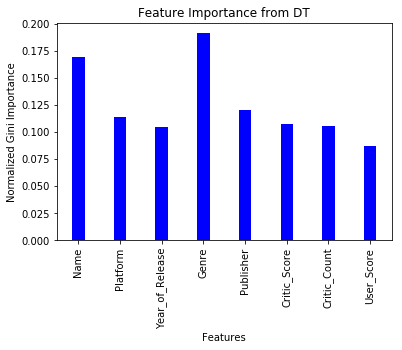

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
width=0.30
ax.bar(np.arange(8), clf.feature_importances_, width, color='b')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train_df.drop('Rating',1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_xlabel('Features')
ax.set_ylabel('Normalized Gini Importance')
plt.show()

<p style="color:Teal">As per the results obtained from the Featere Importance plot above, we have now narrowed down our predictors for predicting our target variale. Thus, deleting columns Critic_Score, User_Count and the User_Count we now train our decision tree algorithm on 6 variables and get an accuracy of nearly 65 percent and other parameters nearly 41 percent which is an improvement over the previous accuracy value.</p>

In [9]:
import warnings
warnings.filterwarnings('ignore')

del df['Critic_Score']
del df['User_Score']
del df['User_Count']

train_df=df.sample(frac=0.8,random_state=50)     #Train data
test_df=df.drop(train_df.index)                  #Test data

Xdt_train=train_df.iloc[:,0:6]              #Predictors
Ydt_train=train_df['Rating']                #Target variable      
Xdt_test=test_df.iloc[:,0:6]
Ydt_test=test_df['Rating']
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xdt_train, Ydt_train)
results_dt = clf.predict(Xdt_test)

print("Accuracy Score for Test Data:", (accuracy_score(Ydt_test,results_dt)))
print("Precision Score for Test Data: ", (precision_score(Ydt_test,results_dt,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Ydt_test,results_dt,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Ydt_test,results_dt,average='macro' )))

Accuracy Score for Test Data: 0.651139240506
Precision Score for Test Data:  0.410915491163
Recall Score for Test Data:  0.416040135083
F1 Score for Test Data:  0.413121740918


<p style="color:Teal">Now we train the decision tree algorithm by setting the criterion as 'entropy', min_samples_leaf and min_samples_split for varying values as mentioned in the leaf and split lists defined in the cell below. Therefore, the plot below describes the modelling of Decision tree algoithm based on different values of number of splits and leaves and from this we can analyse which all values are better for training on our data.</p>

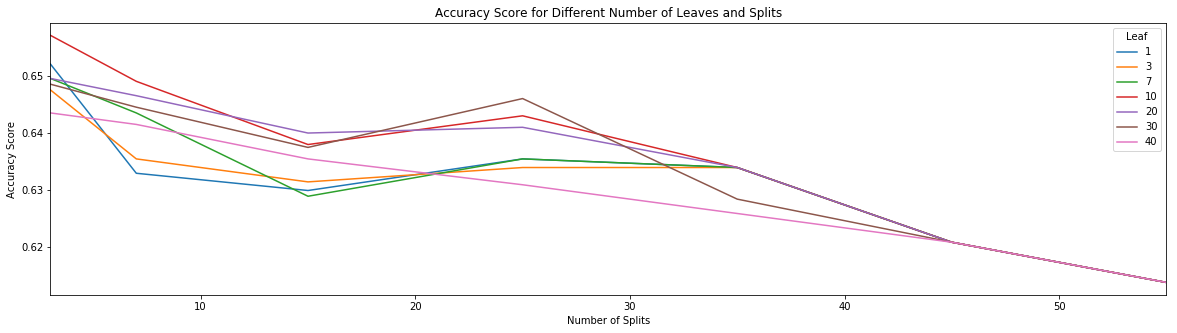

In [10]:
leaf= [1, 3, 7, 10, 20, 30, 40]                 #Range of leaves
split= [3, 7, 15, 25, 35, 45, 55]               #Range of splits
z=0
b=[]
df1 = pd.DataFrame(b, index=split, columns=leaf)
for i in leaf:
    y=0                                       #Training on Decision Trees based on different values of splits and leaves
    for j in split: 
        clf1 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i,min_samples_split=j)
        clf1 = clf1.fit(Xdt_train,Ydt_train)
        results_dt = clf1.predict(Xdt_test)
        c=accuracy_score(Ydt_test,results_dt)
        df1.iloc[z:z+1,y:y+1] = c
        y=y+1
    z=z+1
import matplotlib.pyplot as plt
ax=df1.plot(figsize=(20,5))
plt.title('Accuracy Score for Different Number of Leaves and Splits')
ax.set_xlabel('Number of Splits')
ax.set_ylabel('Accuracy Score')
plt.legend(title="Leaf")
plt.show()

<p style="color:Teal">Now, we have implemented 10 fold cross validation on our data in order to train our decision tree model more effectively by varying the values of depth of the tree. So, we can see how the model gets trained on different values of the depth.</p>

In [11]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import grid_search
from sklearn.cross_validation import *
from pprint import pprint
from sklearn import cross_validation

x=df.iloc[:,0:6]
y=df['Rating'] 

x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.2,random_state=0)
depth = []
for i in range(15, 100, 10):                            #Defining the range of Depth of the tree
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=10, n_jobs=-1)
    depth.append((i,scores.mean()))
print(depth)

[(15, 0.61861437752157333), (25, 0.61577893709683784), (35, 0.61698960514702694), (45, 0.61435916362069487), (55, 0.61546769643024379), (65, 0.61253225145476242), (75, 0.61618122292097621), (85, 0.62124287914106113), (95, 0.61566898736858078)]


<p style="color:Teal">Now, we make another function to clean our data in which we drop the Global_Sales column as its simply the sum of all the other sales values. All the rows having NaN values in the Name, Publisher, User_Score, Developer and the Rating columns are dropped out as these columns are the essential ones and NaN values will greatly affect our predictions. Further, all the NaN values have been replaced by the mean of that column and then new columns have been created for all the variables that are of type object and have been factorized into numerical values to make predictions.</p>

In [12]:
def clean_forest(data):
    data=data.dropna(subset=['Name'])                      #Dropping Rows with NaN values from essential features
    data=data.dropna(subset=['Publisher'])
    data=data.dropna(subset=['User_Score'])
    data=data.dropna(subset=['Developer'])
    data=data.dropna(subset=['Rating'])
    
    data=data.replace('tbd', np.nan)

    del data['Global_Sales']
    
    data=data.fillna(data.mean())                       #Replacing the NaN values by Mean of that row
    data.User_Score=data['User_Score'].fillna(0).astype(float)
    
    data.T.apply(lambda x: x.nunique(), axis=1)
        
    cols = data.dtypes.pipe(lambda y: y[y == 'object']).index
    for c in cols:
        data[c+'_v'] = pd.factorize(data[c])[0]        #Factorising the features of type object
    
    data1 = data[['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score', 'Critic_Count','User_Score','User_Count','Name_v','Platform_v','Genre_v','Publisher_v','Developer_v', 'Rating_v']]
    return data1


<p style="color:Teal">Now, a new dataframe named df2 has been created which has the data after running the clean_forest function on it.</p>

In [13]:
df1 = pd.read_csv('C:/Users/Harsh Yadav/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv', header=0)

<p style="color:Teal">Implementing the Random forest algorithm considering our problem to be Supervised learning problem we first clean the data using the clean_forest function defined above. Then, we split our data into training and testing data with the target variable as Rating and predictor variables as the rest of 14 columns.</p>

In [14]:
df4=clean_forest(df1)

train_df1=df4.sample(frac=0.8,random_state=50)            #Training Data
test_df1=df4.drop(train_df1.index)                         #Testing Data

Xdt_train1=train_df1.iloc[:,0:14]
Ydt_train1=train_df1['Rating_v']                   
Xdt_test1=test_df1.iloc[:,0:14]
Ydt_test1=test_df1['Rating_v']

<p style="color:Teal">Using the Random forest algorithm we get an accuracy of nearly 70 percent which is the best accurcacy obtained uptil now and is quite good. The predicted values are stored in the predicted variable and the accuracy, recall, precision and F1 scores are printed out.</p>

In [15]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=500)         #Modelling based on Random Forest Algorithm
clf.fit(Xdt_train1, Ydt_train1)
predicted = clf.predict(Xdt_test1)                    #Predictions stored in variable named predicted
   
print("Accuracy Score for Test Data:",accuracy_score(Ydt_test1,predicted))
print("Precision Score for Test Data: ", (precision_score(Ydt_test1,predicted,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Ydt_test1,predicted,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Ydt_test1,predicted, average='macro' )))

Accuracy Score for Test Data: 0.703797468354
Precision Score for Test Data:  0.559293073349
Recall Score for Test Data:  0.514513435606
F1 Score for Test Data:  0.529426593632


<p style="color:Teal">Now, using the Gradiant Boost Classifier as the last algorithm for our case, we first vary the values of the n_estimators of the tree for modelling our classifier. The results of prediction are stored in the predicted named variable and then appended to a list named s for plotting. This code takes nearly 10 minutes to execute.</p>

In [16]:
from xgboost import XGBClassifier
s=[]

#Defining range for n_estimators and iterating over different values of these parameters and calculating accuracies
for i in range (10,2000,100):
    model = XGBClassifier(n_estimators=i)
    clf=model.fit(Xdt_train1, Ydt_train1)
    predicted = clf.predict(Xdt_test1)
    s.append(accuracy_score(Ydt_test1,predicted))

<p style="color:Teal">Plotting the values of accuracy depending the number of estimators and depth of the Gradiant boost classifier we observe that as the number of estimators and depth increase, the accuracy increases, but after a certain value of Depth the accuracy becomes constant afer reaching the peak. So, the Gradinat boost classifier performs best at the value of Depth as nearly 10 (as we see a peak in the beginning of every iteration for n_estimators) and number of estimators as nearly 165.We evaluated these values by printing the accuracies for individual n_estimators, depth pairs.</p>

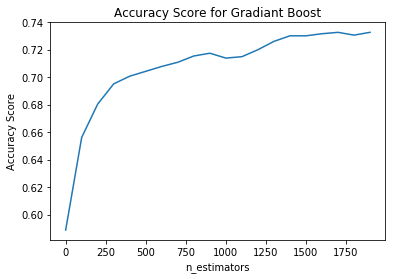

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = range(1,2000, 100)                               #range for x axis
                                                     #Plot for accuracy based on n_estimators
p2 = plt.plot(x,s)
plt.title('Accuracy Score for Gradiant Boost')
ax.set_xlabel('n_estimators')
ax.set_ylabel('Accuracy Score')
ax.legend()
plt.show()

<p style="color:Teal">Plotting the values of accuracy depending on the varied number of n_estimators for the Gradiant boost classifier we observe that as the n_estimators increase, the accuracy increases, but after a certain value of nearly 1500, the accuracy becomes constant. So, now we set n_estimators to 1500 and compute accuracy on varied values of max depth.</p>

In [18]:
d=[]

#Defining range for depths and iterating over different values of these parameters and calculating accuracies
for j in range (10,100,10):
    model = XGBClassifier(max_depth=j, n_estimators=1500)
    clf=model.fit(Xdt_train1, Ydt_train1)
    predicted = clf.predict(Xdt_test1)
    d.append(accuracy_score(Ydt_test1,predicted))

<p style="color:Teal">Plotting the values of accuracy depending on the number of n_estimators which is set to 1500 as infered from the above plot and varyng max depth of the Gradiant boost classifier we observe that as the depth increase, the accuracy increases first at max depth value of 20 then falls a little to 75 percent, but after a certain value of Depth the accuracy becomes constant. So, the Gradinat boost classifier performs best at the value of Depth as nearly 20 (as we see a peak in the beginning of iteration) and number of estimators as nearly 1500. We evaluated these values by printing the accuracies for individual n_estimators, depth pairs.</p>

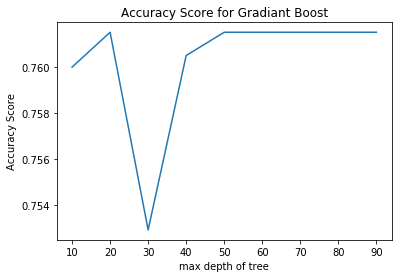

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = range(10,100, 10)                                #range for x axis
                                                     #Plot for accuracy based on max depth
p2 = plt.plot(x,d)
plt.title('Accuracy Score for Gradiant Boost')
ax.set_xlabel('max depth of tree')
ax.set_ylabel('Accuracy Score')
ax.legend()
plt.show()

<p style="color:Teal">Predicting on the test data for the values of Depth and number of estimators derived above, we get an accuracy score of 76.15 percent, recall of 58 percent, precision of 59.5 percent and F1 score of 58.7 percent and thus we have trained our algorithm quite accurately.</p>

In [20]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1500, max_depth=20)                  #Setting parameters as derived from plots above
clf=model.fit(Xdt_train1, Ydt_train1)
predicted = clf.predict(Xdt_test1)
print("Accuracy Score for Test Data:",accuracy_score(Ydt_test1,predicted))
print("Precision Score for Test Data: ", (precision_score(Ydt_test1,predicted,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Ydt_test1,predicted,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Ydt_test1,predicted, average='macro' )))

Accuracy Score for Test Data: 0.761518987342
Precision Score for Test Data:  0.595147357358
Recall Score for Test Data:  0.580892593676
F1 Score for Test Data:  0.587238810049


<p style="color:Teal">Here our analysis for best Ratings/ Age Groups for a video game ends. We infer that if we use the XG Boost algorithm to predict our Age Groups, then we qill get very accurate results, as compared to other algorithms. Though we might also consider Random Forest for aur analysis, as it has quite close results as compared to XG Boost Algorithm.</p>

## Part 2: Predicting Sales of a Video Games

<p style="color:Teal">In this part, we predict the value of Global Sales of a video game (in millions). We do so, by modelling using the Decision Tree and Random Forrest Algorithms and our results are very accurate in predicting the results.</p>

<p style="color:Teal">First, we create the clean_sales named function that performs dataset cleaning. It drops all the rows having NaN values in the Name, Publisher, User_Score, Developer and the Rating columns as these columns are the essential ones and NaN values will greatly affect our predictions. Then the Developer, NA_Sales, EU_Sales, JP_Sales, Other_Sales columns have been dropped as we are just interested in predicting the Global Sales value which is the sum of all these sales. Further, all the NaN values in remaining columns have been replaced by the medain of that column and then all the variables that are of type object and have been factorized into numerical values to make predictions. Then, we have created bins for the Global Sales value. The reason for doing so has been explained in the comments below.</p>

In [21]:
def clean_sales(data):
    data=data.dropna(subset=['Name'])                      #Dropping Rows with NaN values from essential features
    data=data.dropna(subset=['Publisher'])
    data=data.dropna(subset=['User_Score'])
    data=data.dropna(subset=['Developer'])
    data=data.dropna(subset=['Rating'])
    
    data=data.replace('tbd', np.nan)

    del data['NA_Sales']
    del data['EU_Sales']
    del data['JP_Sales']
    del data['Other_Sales']
    
    data=data.fillna(data.mean())                       #Replacing the NaN values by Mean of that row
    data.User_Score=data['User_Score'].fillna(0).astype(float)
    
    data.T.apply(lambda x: x.nunique(), axis=1)
        
    cols = data.dtypes.pipe(lambda y: y[y == 'object']).index
    for c in cols:
        data[c+'_v'] = pd.factorize(data[c])[0]        #Factorising the features of type object
    
    data1 = data[['Year_of_Release','Critic_Score', 'Critic_Count','User_Score','User_Count','Name_v',\
                  'Platform_v','Genre_v','Publisher_v','Developer_v', 'Rating_v', 'Global_Sales']]
    
    '''Creating categories for Global Sales feature, inorder to put sales by a bin value instead of continuous values,
    which makes prediction less accurate and also, we need to encode the floating values to integers for making predictions
    using Regression models. SO we choose to create bins and predict the bin for the test data, depending on the features
    in pur data frame'''
    
    data1.Global_Sales=pd.cut(data1.Global_Sales, [0, 3, 7, 10, 13, 17, 20, 23, 27, 30, 33, np.inf],\
                        labels=['between 0 & 3m', 'between 3 & 7m', 'between 7 & 10m', \
                                'between 10 & 13m','between 13 & 17m', 'between 17 & 20m', 'between 20 & 23m', \
                                'between 23 & 27m', 'between 27 & 30m', 'between 30 & 33m', 'more than 33m'])
    return data1

<p style="color:Teal">Reading the dataset into dataframe named df4 and then cleaning in using the above written function. Then loading the clened dataframe to other dataframe named df5.</p>

In [22]:
df4 = pd.read_csv('C:/Users/Harsh Yadav/Downloads/Video_Games_Sales_as_at_22_Dec_2016.csv', header=0)
df5= clean_sales(df4)

<p style="color:Teal">Creating testing and training dataframe, by choosing the randomizer function. The we take the Global Sales column as our target variable and rest all columns as predictors for our modelling.</p>

In [23]:
train_sales=df5.sample(frac=0.8,random_state=50)              #Train data
test_sales=df5.drop(train_sales.index)                        #Test Data

X_trainsales=train_sales.iloc[:,0:11]                         #predictors
Y_trainsales=train_sales['Global_Sales']                     #target variable
X_testsales=test_sales.iloc[:,0:11]
Y_testsales=test_sales['Global_Sales']

<p style="color:Teal">Training the Decision tree algorithm by setting the criterion="entropy". Then, we predict our values of Global Sales into variable named predicted1. We get an accuracy of 98 percent, precision of 78 percent, recall of 77 percent and F1 score of 77 percent. Thus, we have trained a very accurate model for predicting Global sales based on predictors like 'Year_of_Release','Critic_Score', 'Critic_Count','User_Score','User_Count','Name_v', 'Platform_v','Genre_v','Publisher_v','Developer_v', 'Rating_v'.</p>    

In [24]:
clf1 = tree.DecisionTreeClassifier(criterion="entropy")   #Training using Decision Tree Algorithm
clf1.fit(X_trainsales, Y_trainsales)
predicted1 = clf1.predict(X_testsales)                    #Predictions stored in variable named predicted1
   
print("Accuracy Score for Test Data:",accuracy_score(Y_testsales,predicted1))
print("Precision Score for Test Data: ", (precision_score(Y_testsales,predicted1,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Y_testsales,predicted1,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Y_testsales,predicted1, average='macro' )))

Accuracy Score for Test Data: 0.984303797468
Precision Score for Test Data:  0.576235174409
Recall Score for Test Data:  0.598407381306
F1 Score for Test Data:  0.586422517304


<p style="color:Teal">Training the Random Forest algorithm by setting the n_estimators=100. Then, we predict our values of Global Sales into variable named predicted. We get an accuracy of 98 percent, precision of 76 percent, recall of 74 percent and F1 score of 75 percent.</p>

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=100)         #Modelling based on Random Forest Algorithm
clf2.fit(X_trainsales, Y_trainsales)
predicted = clf2.predict(X_testsales)                    #Predictions stored in variable named predicted
   
print("Accuracy Score for Test Data:",accuracy_score(Y_testsales,predicted))
print("Precision Score for Test Data: ", (precision_score(Y_testsales,predicted,average='macro' )))
print("Recall Score for Test Data: ", (recall_score(Y_testsales,predicted,average='macro' )))
print("F1 Score for Test Data: ", (f1_score(Y_testsales,predicted, average='macro' )))

Accuracy Score for Test Data: 0.987341772152
Precision Score for Test Data:  0.797164054336
Recall Score for Test Data:  0.811260428242
F1 Score for Test Data:  0.793810222469


<p style="color:Teal">In this part, we summarize by predicting the value of Global Sales of a video game very accurately. We can do it by using any of the algorithms mentioned above in this part, as both are very accurate in predicting results. Decision Trees has better results than Random Forest. We have considered Year_of_Release','Critic_Score', 'Critic_Count','User_Score','User_Count','Name_v', 'Platform_v','Genre_v','Publisher_v','Developer_v', 'Rating_v' as our predictors.</p>

## Part 3: Visualizing the Data 

<p style="color:Teal">In this part we create visualizations about the sales of Video games by each continent n=based on video game Genre, Platfrom, Publisher and Critic SCores. The inferences are then summarized with each plot.</p>

<p style="color:Teal">Plotting the graph representing the sales of Video games in each continent based on Genre. We can observe that all the Genre are famous in North America except Role Playing games. The Role playing games are most famous in Japan/ Asia. Also, we can observe that Action, Shooter and Sports video games are the ones that are the famous in all the continents except Japan. Further, it can be easily analysed that Racing games are most famous in Europe and after that in North America. The people in Europe are least interested in strategy games and the people in Japan are least interesed in Action, Shooter and Sports games. Apart from this we can observe that the Adventure, Puzzle and Strategy games are the ones which very few people find interesting overall. So, from this plot we can make an inference that the video game publishers who publish Action, Shooter and Sports games will be highly successful anywhere in the world except Japan. But if a publisher publishes a Role playing game then they will be highly successful in Japan and some other countries, but they may not be that successful in Europe and North America.</p>

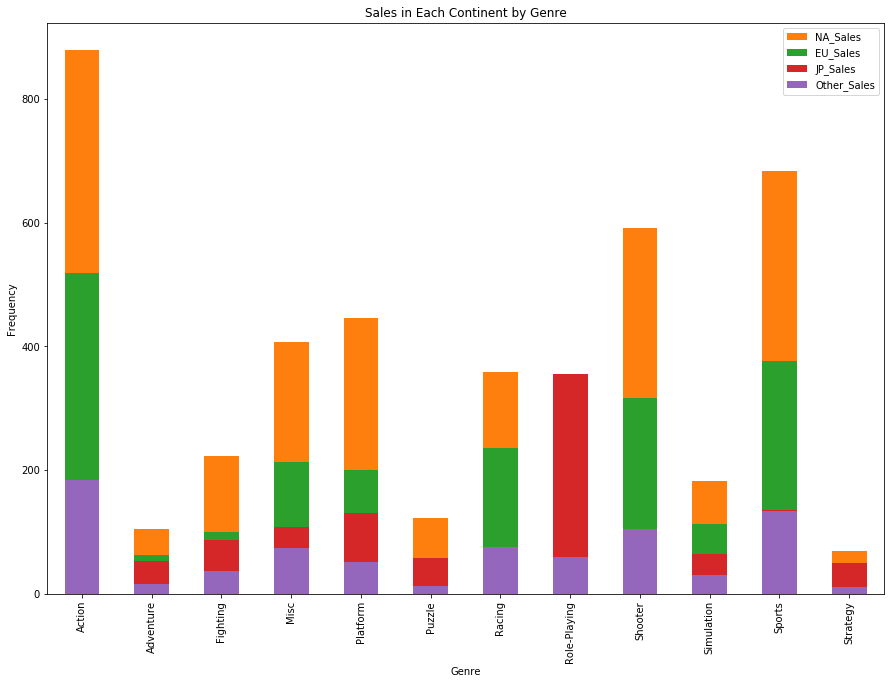

In [26]:
fig = plt.figure()
ax = plt.subplot(111)

#Grouping sales by Genre for different continents

df1['NA_Sales'].groupby([df1.Genre]).sum().plot(kind='bar', color="C1")
df1['EU_Sales'].groupby([df1.Genre]).sum().plot(kind='bar', color="C2")
df1['JP_Sales'].groupby([df1.Genre]).sum().plot(kind='bar', color="C3")
df1['Other_Sales'].groupby([df1.Genre]).sum().plot(kind='bar', color="C4")
fig.set_size_inches(15, 10.5, forward=True)
plt.title('Sales in Each Continent by Genre')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

<p style="color:Teal">Now, analysisng the same plot with different view as recommended by TA Josua, we observe that the inferences made above are correct. But, this graph represents the values more nicely.</p>

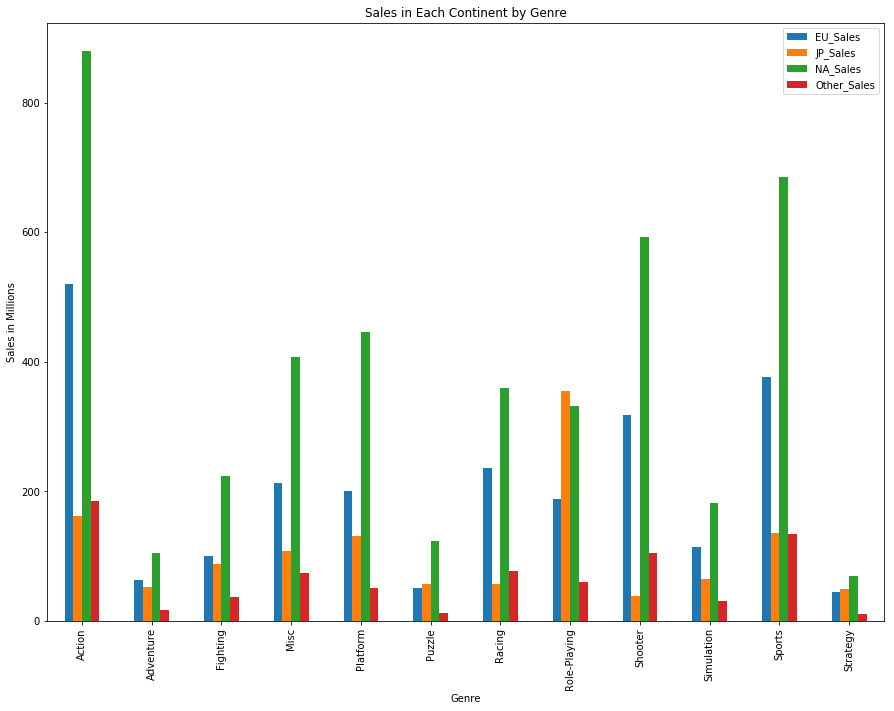

In [27]:
#Grouping sales by Genre for different continents and creating dataframe based on Sales columns and then plotting

na=df1['NA_Sales'].groupby([df1.Genre]).sum()
eu=df1['EU_Sales'].groupby([df1.Genre]).sum()
jp=df1['JP_Sales'].groupby([df1.Genre]).sum()
os=df1['Other_Sales'].groupby([df1.Genre]).sum()

#Putting the lists created for each continent into a dataframe
gr = pd.DataFrame(
    {'NA_Sales': na,
     'EU_Sales': eu,
     'JP_Sales': jp,
     'Other_Sales': os
    })
gr.plot.bar(figsize=(15, 11))
plt.title('Sales in Each Continent by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales in Millions')
plt.show()

<p style="color:Teal">Here, we have a plot that represents the sales of different Video Game platforms in different continents. So, based on this plot we can infer that XBox 360 is the best selling gaming platform followed by PS2 even though it has almost negligible sales in Japan. It's most famous in North America and Europe. Most famous gaming platforms are thus the XBox 360, PS2 and Wii, but they have no sales in Japan. Gaming platforms such as SNES, DS, NES and 3DS are the most famous platforms in Japan, but they are not that influencial in other parts of the world except DS which is popular in North Amarica and some other countries. Similarly, we can infer that PS is the video game platform which is quite famous in all the continents. Also, gaming platforms like 3D0, GG, NG, PCFX, SCD, TG16 and WS are the least famous gaming platforms in all the continents and if a publisher plans to launch a game on these platforms then they might not be that successful with that game. Therefore, games released on Wii, PS3 and XBox360 are more probable to be famous and have good sales.</p>

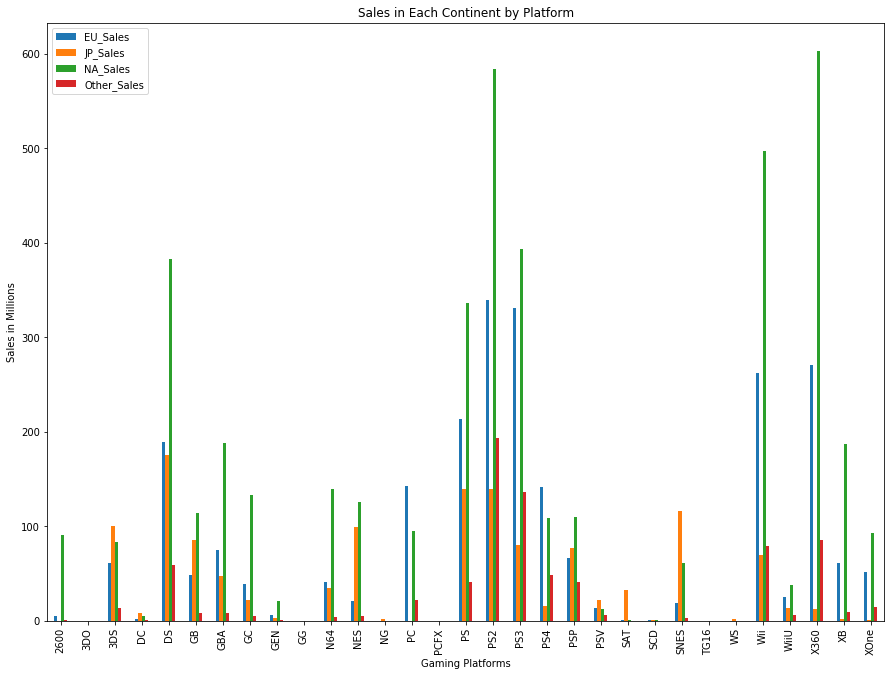

In [28]:
na=df1['NA_Sales'].groupby([df1.Platform]).sum()
eu=df1['EU_Sales'].groupby([df1.Platform]).sum()
jp=df1['JP_Sales'].groupby([df1.Platform]).sum()
os=df1['Other_Sales'].groupby([df1.Platform]).sum()

#Putting the lists created for each continent into a dataframe
gr = pd.DataFrame(
    {'NA_Sales': na,
     'EU_Sales': eu,
     'JP_Sales': jp,
     'Other_Sales': os
    })
gr.plot.bar(figsize=(15, 11))
plt.title('Sales in Each Continent by Platform')
plt.xlabel('Gaming Platforms')
plt.ylabel('Sales in Millions')
plt.show()

<p style="color:Teal">From this plot we try to infer the average critic scores of each video game platform and we can make an observation that the DC platform has the best average critic score followed by PC and XBox One. Further, Gaming Platforms such as 2600, 3D0, GB, GEN, GG, etc do not have any critic scores. So, from this we can infer very little about the Critic scores of the video game platforms. Also, our inference that DC has the best critic score can be biased as it can be possible that only one user might have provided a high critic score and thus it tops the list. But, still we can infer that XBox, PS and Wii have good critic scores.</p>

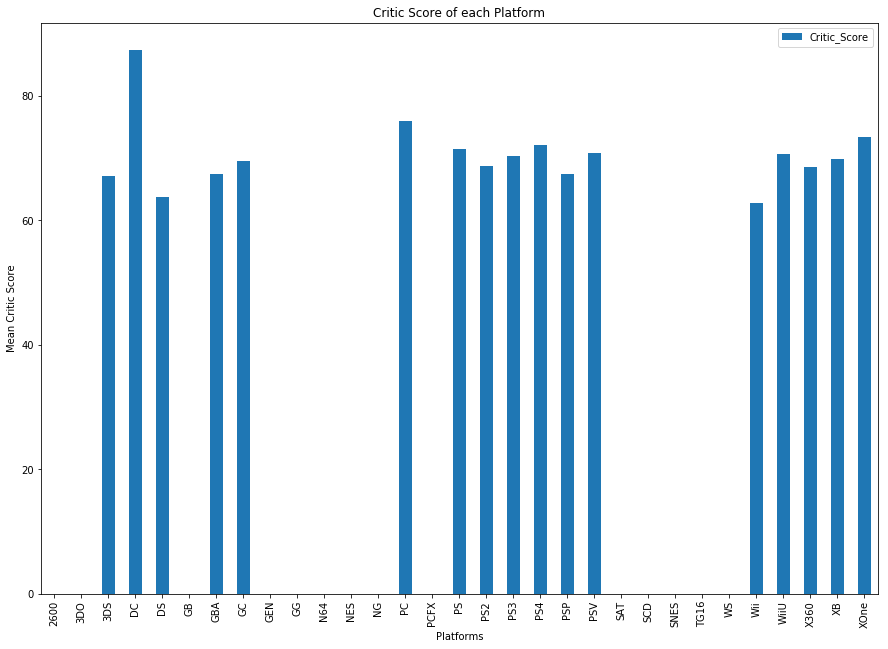

In [29]:
fig = plt.figure()
ax = plt.subplot(111)
df1['Critic_Score'].groupby([df1.Platform]).mean().plot(kind='bar')  #Grouping by Platform and plotting sales for continents
fig.set_size_inches(15, 10.5, forward=True)
plt.title('Critic Score of each Platform')
ax.set_ylabel('Mean Critic Score')
ax.set_xlabel('Platforms')
ax.legend()
plt.show()

<p style="color:Teal">From this Plot we can infer that Role Playing, Sports and Strategy games have the best mean critic scores as compared to the other game Genres.</p>

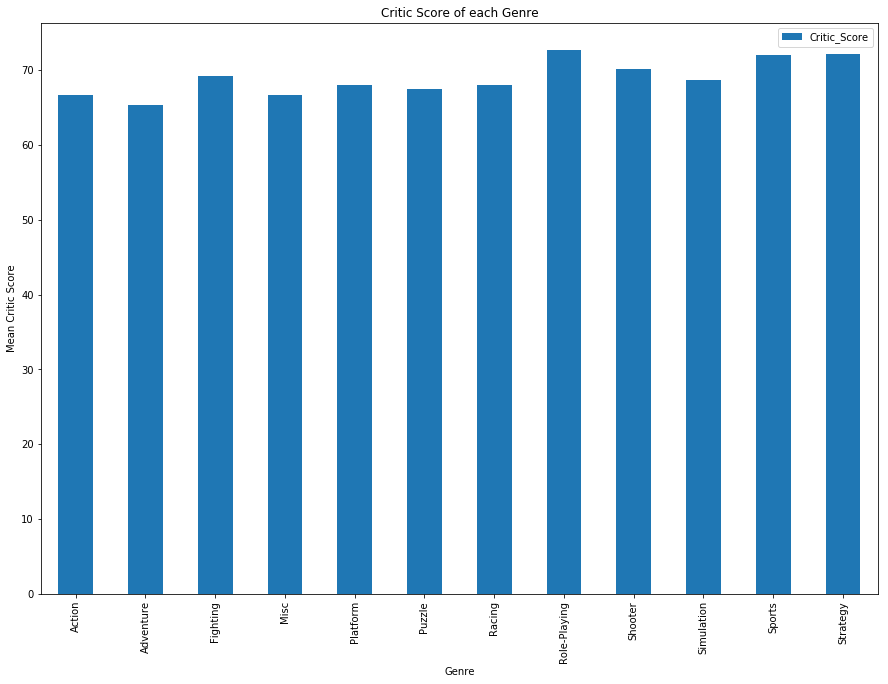

In [30]:
fig = plt.figure()
ax = plt.subplot(111)
df1['Critic_Score'].groupby([df1.Genre]).mean().plot(kind='bar') #Grouping by Genre and plotting
fig.set_size_inches(15, 10.5, forward=True)
plt.title('Critic Score of each Genre')
ax.set_ylabel('Mean Critic Score')
ax.set_xlabel('Genre')
ax.legend()
plt.show()

<p style="color:Teal">In this plot we have considerd the top 10 video game Publishers and from this plot we can infer that Nintendo is the best selling gaming publisher followed by Electronic Arts, but Electronic Arts has negligible sales in Europe. So, we can infer that inorder for Electonic Arts to gain popularity in Europe and increase their sales, they can release their games on Gaming Platforms like PS2 or XBox 360 and make Action or Shooter games which are very popular in Europe and other parts of the world.</p>

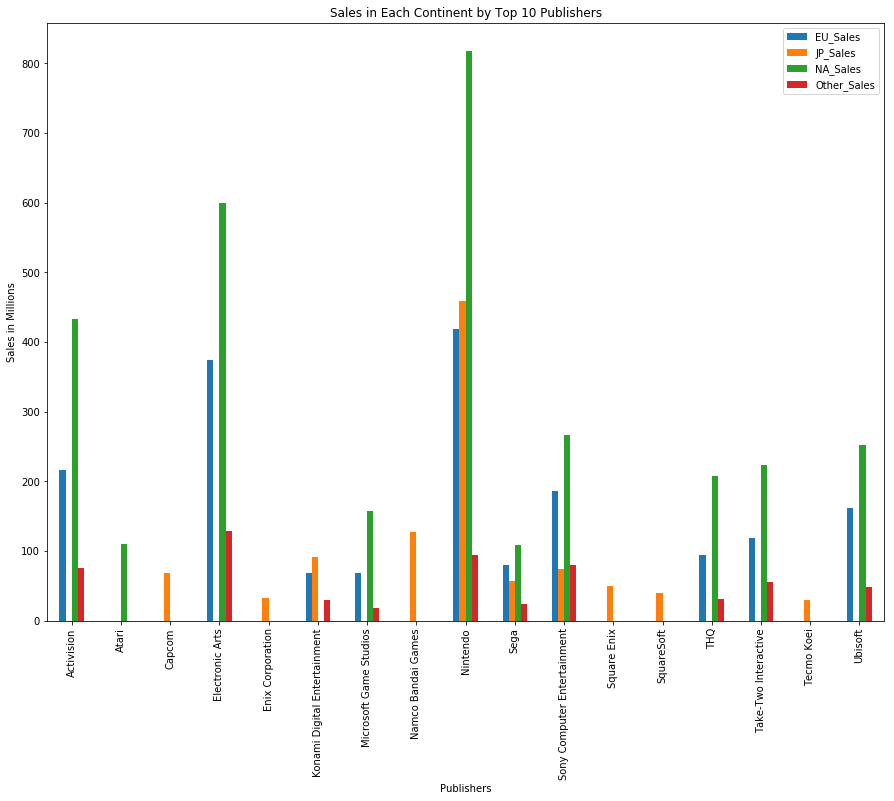

In [31]:
na=df1['NA_Sales'].groupby([df1.Publisher]).sum().sort_values(ascending= False)[:10]
eu=df1['EU_Sales'].groupby([df1.Publisher]).sum().sort_values(ascending= False)[:10]
jp=df1['JP_Sales'].groupby([df1.Publisher]).sum().sort_values(ascending= False)[:10]
os=df1['Other_Sales'].groupby([df1.Publisher]).sum().sort_values(ascending= False)[:10]

#Putting the lists created for each continent into a dataframe
gr = pd.DataFrame(
    {'NA_Sales': na,
     'EU_Sales': eu,
     'JP_Sales': jp,
     'Other_Sales': os
    })
gr.plot.bar(figsize=(15, 11))
plt.title('Sales in Each Continent by Top 10 Publishers')
plt.xlabel('Publishers')
plt.ylabel('Sales in Millions')
plt.show()

<p style="color:Teal">So, at the end we can infer from aur data that XBox 360, Wii and PS are the best selling platfroms across all the continents except Japan where SNES, DS, NES and 3DS which are Nintendo based gaming platforms are the best selling platforms, but they don't have good sales in other parts of the world.</p> 
<p style="color:Teal">Secondly, we can infer that if a Role playing game is produced in Japan on a SNES, DS, NES or 3DS gaming platform then it will most likely be successful as compared to other gaming platforms.</p>
<p style="color:Teal">Third, if a publisher produces an Action, Shooter or Sports video game in North America and Europe on a XBox 360 or Wii platform it will be hightly successful as compared to any other genre or gaming platform. 
<p style="color:Teal">Fourth, people in Europe are least interested in strategy and puzzle, role playing and adventure games and if they are produced on gaming platforms like XBox 360, PS, Wii then they might be successful.</p>
<p style="color:Teal">Fifth, based on the critic scores we can say that PS, XBox 360 and Wii are among the best gaming platforms.</p>
<p style="color:Teal">Sixth, based on the Gaming Publishers we can say that Nintendo is the best selling gaming publisher followed by Electronic Arts, but Electronic Arts has negligible sales in Europe. So , we can infer that in order for Electonic Arts to gain popularity in Europe and increase their sales, they can release their games on Gaming Platforms like PS2 or XBox 360 and make Action or Shooter games.</p>
<p style="color:Teal">Seventh, Sports, Role Playing and Strategy games have the best critic scores as compared to the other game Genre.</p>